In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
from matplotlib import font_manager

# 设置中文字体（适用于 Windows 系统）
plt.rcParams['font.sans-serif'] = ['SimHei']   # 黑体
plt.rcParams['axes.unicode_minus'] = False     # 正常显示负号

# Homework3-3: Data Research

### 数据预处理：读取+清洗+合并

In [2]:
# 1. 定义通用清洗函数
def clean_numeric(value):
    """去除字符串中的非数字和小数点字符，并转为float"""
    if pd.isna(value):
        return None
    num = re.findall(r"[\d.]+", str(value))
    return float(num[0]) if num else None


In [3]:
# 2. 读取不同block的房价数据（1表示徐家汇，2表示龙华，3表示康健）
file_price_1 = 'housing_price_data_1.xlsx'
file_price_2 = 'housing_price_data_2.xlsx'
file_price_3 = 'housing_price_data_3.xlsx'

# 定义房价数据处理函数
def process_file_price(filename, label_value):
    df = pd.read_excel(filename)
    print(df)

    # 去除单位，只保留数字
    df['price_m2'] = df['price_m2'].apply(clean_numeric)
    df['price'] = df['price'].apply(clean_numeric) * 10000
    df['m2'] = df['m2'].apply(clean_numeric)

    # 替换location为数字标签
    df['location'] = label_value

    return df

# 处理房价数据
df_price_1 = process_file_price(file_price_1, 1)
df_price_2 = process_file_price(file_price_2, 2)
df_price_3 = process_file_price(file_price_3, 3)

# 合并为房价数据总表
merged_df_price = pd.concat([df_price_1, df_price_2, df_price_3], ignore_index=True)
print(merged_df_price.head(10))

# 导出结果
merged_df_price.to_excel('housing_price_data.xlsx', index=False)

print("✅ 数据清洗与合并完成！已输出文件：housing_price_data.xlsx")
print("数据总行数：", len(merged_df_price))


       price_m2  price       m2                      location
0      88449元/㎡  1298万  146.75㎡            海螺花园\n徐家汇 宛平南路388弄
1      94656元/㎡  1580万  166.92㎡          四季园\n徐家汇 东安路149弄1-8号
2     115101元/㎡  1080万   93.83㎡            东方曼哈顿\n徐家汇 虹桥路168号
3     101486元/㎡   478万    47.1㎡            东安四村\n徐家汇 宛平南路727弄
4      91361元/㎡   496万   54.29㎡                零陵小区\n徐家汇 零陵小区
...         ...    ...      ...                           ...
1195   79636元/㎡   998万  125.32㎡          四季园\n徐家汇 东安路149弄1-8号
1196   96190元/㎡  1010万     105㎡        天际花园\n徐家汇 南丹东路99弄1-22号
1197  118753元/㎡  2160万  181.89㎡        虹桥乐庭\n徐家汇 虹桥路666弄5-18号
1198   94423元/㎡  1280万  135.56㎡          明辉苑\n徐家汇 宜山路406弄1-8号
1199   74936元/㎡   470万   62.72㎡  肇嘉浜路853弄小区\n徐家汇 肇嘉浜路853弄55支弄

[1200 rows x 4 columns]
       price_m2  price       m2          location
0     111177元/㎡  1850万   166.4㎡          龙华 尚海湾豪庭
1      88470元/㎡  1230万  139.03㎡       龙华 天钥桥路968弄
2     185840元/㎡  2100万     113㎡        龙华 云锦路183弄
3     185752元/㎡  2099万     113㎡

In [4]:
# 3. 读取不同block的房租数据（1表示徐家汇，2表示龙华，3表示康健）
file_rent_1 = 'housing_rent_data_1.xlsx'
file_rent_2 = 'housing_rent_data_2.xlsx'
file_rent_3 = 'housing_rent_data_3.xlsx'

# 定义房租数据处理函数
def process_file_rent(filename, label_value):
    df = pd.read_excel(filename)
    print(df)

    # 去除单位，只保留数字，计算rent_m2
    df['rent'] = df['rent'].apply(clean_numeric)
    df['m2'] = df['m2'].apply(clean_numeric)
    df['rent_m2'] = (df['rent'] / df['m2']).round().astype('Int64')

    # 替换location为数字标签
    df['location'] = label_value

    # 调整列顺序
    df = df[['rent_m2', 'rent', 'm2', 'location']]

    return df

# 处理房租数据
df_rent_1 = process_file_rent(file_rent_1, 1)
df_rent_2 = process_file_rent(file_rent_2, 2)
df_rent_3 = process_file_rent(file_rent_3, 3)

# 合并为房租数据总表
merged_df_rent = pd.concat([df_rent_1, df_rent_2, df_rent_3], ignore_index=True)
print(merged_df_rent.head(10))

# 导出结果
merged_df_rent.to_excel('housing_rent_data.xlsx', index=False)

print("✅ 数据清洗与合并完成！已输出文件：housing_rent_data.xlsx")
print("数据总行数：", len(merged_df_rent))


          rent    m2           location
0     10800元/月  102㎡       徐汇-田林-徐汇世家花园
1      5800元/月   41㎡         徐汇-田林-田林七村
2      7500元/月   81㎡         徐汇-田林-金丽广场
3      4600元/月   44㎡    徐汇-康健-钦州路111弄小区
4      6600元/月   83㎡         徐汇-漕河泾-桂林苑
...        ...   ...                ...
1195   4300元/月   54㎡         徐汇-田林-钦州花苑
1196   4900元/月   47㎡         徐汇-田林-田林新苑
1197  55000元/月  320㎡        徐汇-衡山路-上海天玺
1198   4600元/月   45㎡    徐汇-田林-宜山路701弄小区
1199   4200元/月   33㎡  徐汇-徐家汇-斜土路2200弄公房

[1200 rows x 3 columns]
           rent    m2 location
0     100000元/月  440㎡       徐汇
1      10500元/月  107㎡       徐汇
2       3900元/月   32㎡       徐汇
3      40000元/月  237㎡       徐汇
4       3900元/月   32㎡       徐汇
...         ...   ...      ...
1195   11000元/月   96㎡       徐汇
1196    6800元/月   66㎡       徐汇
1197   22500元/月  208㎡       徐汇
1198    6300元/月   55㎡       徐汇
1199    5100元/月   43㎡       徐汇

[1200 rows x 3 columns]
         rent    m2         location
0     4600元/月   44㎡  徐汇-康健-钦州路111弄小区
1     3500元/月   34㎡     

### 数据描述与异常值检测

In [5]:
# 读取数据
price_df = merged_df_price
rent_df = merged_df_rent

# 数据描述与异常值检测
def describe_by_block(df, col_name):
    desc = df.groupby('location')[col_name].describe()
    print(f"\n📊 Descriptive statistics for {col_name}:")
    print(desc)

    # 异常值检测（IQR）
    print(f"\n🚨 Outlier detection for {col_name}:")
    for loc, group in df.groupby('location'):
        Q1 = group[col_name].quantile(0.25)
        Q3 = group[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = group[(group[col_name] < lower) | (group[col_name] > upper)]
        print(f"Block {loc}: {len(outliers)} outliers")

# 显示结果
print("房价数据的单价：")
describe_by_block(price_df, 'price_m2')
print("房价数据的面积：")
describe_by_block(price_df, 'm2')
print("房租数据的单价：")
describe_by_block(rent_df, 'rent_m2')
print("房租数据的面积：")
describe_by_block(rent_df, 'm2')


房价数据的单价：

📊 Descriptive statistics for price_m2:
           count          mean           std      min       25%      50%  \
location                                                                   
1         1200.0  89896.805833  18067.163361  33788.0  77182.00  88169.5   
2         1200.0  99351.757500  34675.363779  39743.0  73675.25  89623.5   
3         1200.0  59786.562500  18150.534952  32554.0  46997.75  54781.0   

                75%       max  
location                       
1          99977.50  180772.0  
2         120438.75  228312.0  
3          67991.00  137642.0  

🚨 Outlier detection for price_m2:
Block 1: 27 outliers
Block 2: 20 outliers
Block 3: 51 outliers
房价数据的面积：

📊 Descriptive statistics for m2:
           count        mean        std    min      25%      50%       75%  \
location                                                                     
1         1200.0  109.786067  49.597870  29.47  69.6700  110.895  139.0200   
2         1200.0  119.889858  68.64

### 房价房租比的计算与可视化


🏠 Median Price-to-Rent Ratio by Block:
          median_price_m2  median_rent_m2  price_to_rent_ratio
location                                                      
徐家汇               88169.5           110.0           801.540909
龙华                89623.5           122.0           734.618852
康健                54781.0           100.0               547.81


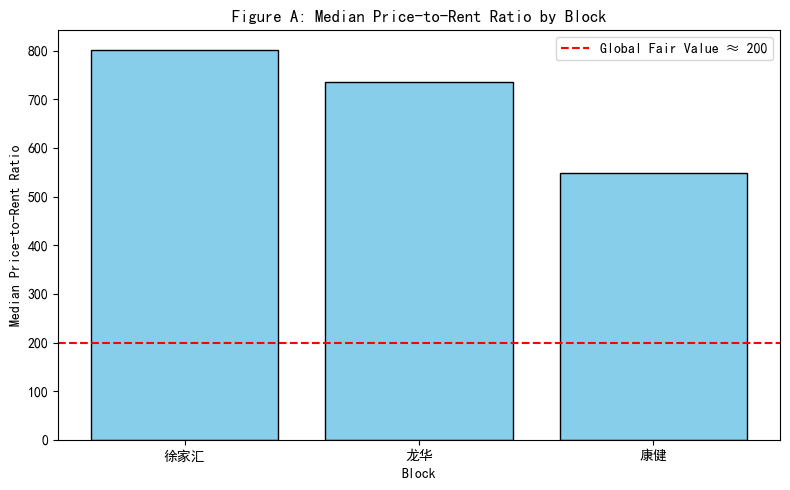

In [6]:
# 计算每个 block 的中位数
price_median = price_df.groupby('location')['price_m2'].median()
rent_median = rent_df.groupby('location')['rent_m2'].median()

# 计算价格-租金比
ratio_df = pd.DataFrame({
    'median_price_m2': price_median,
    'median_rent_m2': rent_median
})
ratio_df['price_to_rent_ratio'] = ratio_df['median_price_m2'] / ratio_df['median_rent_m2']

# 输出每个 block 的 median ratio
ratio_df.index = ratio_df.index.map({1: '徐家汇', 2: '龙华', 3: '康健'})
print("\n🏠 Median Price-to-Rent Ratio by Block:")
print(ratio_df)

# 绘制柱状图
plt.figure(figsize=(8,5))
plt.bar(ratio_df.index.astype(str), ratio_df['price_to_rent_ratio'], color='skyblue', edgecolor='black')
plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value ≈ 200')
plt.title('Figure A: Median Price-to-Rent Ratio by Block')
plt.xlabel('Block')
plt.ylabel('Median Price-to-Rent Ratio')
plt.legend()
plt.tight_layout()
plt.show()


# Homework3-4: Data Science Modeling

### OLS回归与数据预测

In [7]:
# 建立模型1：price_m2 ~ m2 + location
X_price = price_df[['m2', 'location']]
X_price = sm.add_constant(X_price)  # 添加常数项 β0
y_price = price_df['price_m2']
model_price = sm.OLS(y_price, X_price).fit()
print(model_price.summary())

# 预测房价
price_df['price_m2_pred'] = model_price.predict(X_price)
price_df['price_pred'] = price_df['price_m2_pred'] * price_df['m2']
print(price_df[['location', 'm2', 'price_m2_pred', 'price_pred']].head(10))
price_df.to_excel('housing_price_data_pred.xlsx', index=False)


                            OLS Regression Results                            
Dep. Variable:               price_m2   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1035.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:56:55   Log-Likelihood:                -41409.
No. Observations:                3600   AIC:                         8.282e+04
Df Residuals:                    3597   BIC:                         8.284e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.378e+04   1372.496     61.041      0.0

In [8]:
# 建立模型2：rent_m2 ~ m2 + location
X_rent = rent_df[['m2', 'location']]
X_rent = sm.add_constant(X_rent)
y_rent = rent_df['rent_m2']
model_rent = sm.OLS(y_rent, X_rent).fit()
print(model_rent.summary())

# 预测房租
rent_df['rent_m2_pred'] = model_rent.predict(X_rent)
rent_df['rent_pred'] = rent_df['rent_m2_pred'] * rent_df['m2']
print(rent_df[['location', 'm2', 'rent_m2_pred', 'rent_pred']].head(10))
rent_df.to_excel('housing_rent_data_pred.xlsx', index=False)


                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           6.60e-79
Time:                        11:56:56   Log-Likelihood:                -17048.
No. Observations:                3328   AIC:                         3.410e+04
Df Residuals:                    3325   BIC:                         3.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3209      2.149     51.810      0.0

In [9]:
# 建立模型2：rent_m2 ~ m2 + location
X_rent = rent_df[['m2', 'location']]
X_rent = sm.add_constant(X_rent)
y_rent = rent_df['rent_m2']
model_rent = sm.OLS(y_rent, X_rent).fit()
print(model_rent.summary())

# 预测房租
rent_df['rent_m2_pred'] = model_rent.predict(X_rent)
rent_df['rent_pred'] = rent_df['rent_m2_pred'] * rent_df['m2']
print(rent_df[['location', 'm2', 'rent_m2_pred', 'rent_pred']].head(10))
rent_df.to_excel('housing_rent_data_pred.xlsx', index=False)


                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           6.60e-79
Time:                        11:56:56   Log-Likelihood:                -17048.
No. Observations:                3328   AIC:                         3.410e+04
Df Residuals:                    3325   BIC:                         3.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3209      2.149     51.810      0.0

### 预测房价房租比中位数的计算与可视化


🏠 Median Predicted Price-to-Rent Ratio:
     location  median_price_m2_pred  median_rent_m2_pred  \
徐家汇         1          96764.523858           121.256882   
龙华          2          83701.226441           114.605662   
康健          3          62424.244674           108.248020   

     median_price_to_rent_ratio  
徐家汇                  798.012633  
龙华                   730.341113  
康健                   576.677933  


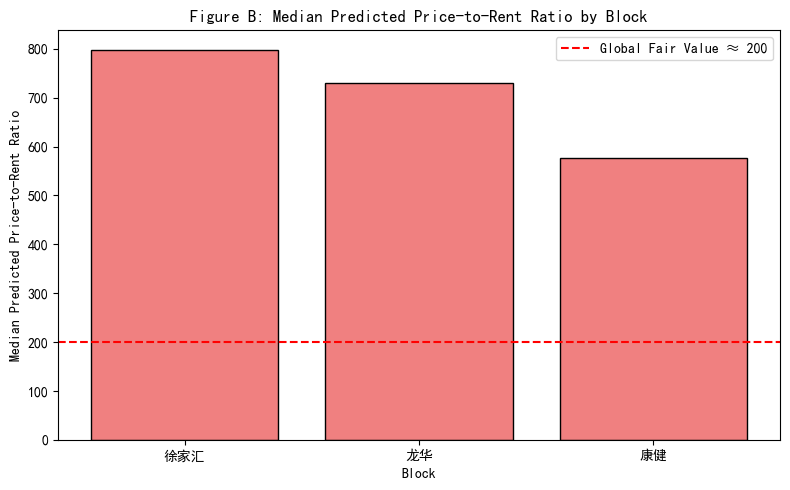

In [10]:
# 各 block 的中位数预测房价与租金
price_median = price_df.groupby('location')['price_m2_pred'].median().reset_index()
price_median.columns = ['location', 'median_price_m2_pred']

rent_median = rent_df.groupby('location')['rent_m2_pred'].median().reset_index()
rent_median.columns = ['location', 'median_rent_m2_pred']

# 合并两者
merged_median = pd.merge(price_median, rent_median, on='location', how='inner')

# 计算每个 block 的房价租金比
merged_median['median_price_to_rent_ratio'] = (
    merged_median['median_price_m2_pred'] / merged_median['median_rent_m2_pred']
)

print("\n🏠 Median Predicted Price-to-Rent Ratio:")
merged_median.index = merged_median.index.map({0: '徐家汇', 1: '龙华', 2: '康健'})
print(merged_median)

# 绘制柱状图
plt.figure(figsize=(8,5))
plt.bar(merged_median.index.astype(str), merged_median['median_price_to_rent_ratio'], color='lightcoral', edgecolor='black')
plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value ≈ 200')
plt.title('Figure B: Median Predicted Price-to-Rent Ratio by Block')
plt.xlabel('Block')
plt.ylabel('Median Predicted Price-to-Rent Ratio')
plt.legend()
plt.tight_layout()
plt.show()


# Homework3-5: Data Science Modeling Pro Max

### 模型比较：OLS回归&OLS+回归（添加非线性项和交互项）与数据预测

In [11]:
# 房价：Model 1 & Model 1+
# Model 1: 线性
X1 = price_df[['m2', 'location']]
X1 = sm.add_constant(X1)
y1 = price_df['price_m2']
model1 = sm.OLS(y1, X1).fit()

# Model 1+: 非线性 + 交互项
price_df['m2_sq'] = price_df['m2'] ** 2
price_df['m2_loc'] = price_df['m2'] * price_df['location']
X1_plus = price_df[['m2', 'location', 'm2_sq', 'm2_loc']]
X1_plus = sm.add_constant(X1_plus)
model1_plus = sm.OLS(y1, X1_plus).fit()

print("Model 1 回归结果")
print(model1.summary())
print("Model 1+ 回归结果")
print(model1_plus.summary())
print("Model 1 & Model 1+ R2对比")
print("✅ Model 1 R²:", round(model1.rsquared, 4))
print("✅ Model 1⁺ R²:", round(model1_plus.rsquared, 4))

# 预测房价
price_df['price_m2_pred_plus'] = model1_plus.predict(X1_plus)
price_df['price_pred_plus'] = price_df['price_m2_pred_plus'] * price_df['m2']
print(price_df[['location', 'm2', 'price_m2_pred_plus', 'price_pred_plus']].head(10))
price_df.to_excel('housing_price_data_pred_plus.xlsx', index=False)


Model 1 回归结果
                            OLS Regression Results                            
Dep. Variable:               price_m2   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1035.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:56:56   Log-Likelihood:                -41409.
No. Observations:                3600   AIC:                         8.282e+04
Df Residuals:                    3597   BIC:                         8.284e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.378e+04   1372.496     61

In [12]:
# 房租：Model 2 & Model 2+
# Model 2: 线性
X2 = rent_df[['m2', 'location']]
X2 = sm.add_constant(X2)
y2 = rent_df['rent_m2']
model2 = sm.OLS(y2, X2).fit()

# Model 2+: 非线性 + 交互项
rent_df['m2_sq'] = rent_df['m2'] ** 2
rent_df['m2_loc'] = rent_df['m2'] * rent_df['location']
X2_plus = rent_df[['m2', 'location', 'm2_sq', 'm2_loc']]
X2_plus = sm.add_constant(X2_plus)
model2_plus = sm.OLS(y2, X2_plus).fit()


print("Model 2 回归结果")
print(model2.summary())
print("Model 2+ 回归结果")
print(model2_plus.summary())
print("Model 2 & Model 2+ R2对比")
print("✅ Model 2 R²:", round(model2.rsquared, 4))
print("✅ Model 2⁺ R²:", round(model2_plus.rsquared, 4))

# 预测租金
rent_df['rent_m2_pred_plus'] = model2_plus.predict(X2_plus)
rent_df['rent_pred_plus'] = rent_df['rent_m2_pred_plus'] * rent_df['m2']
print(rent_df[['location', 'm2', 'rent_m2_pred_plus', 'rent_pred_plus']].head(10))
rent_df.to_excel('housing_rent_data_pred_plus.xlsx', index=False)


Model 2 回归结果
                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           6.60e-79
Time:                        11:56:57   Log-Likelihood:                -17048.
No. Observations:                3328   AIC:                         3.410e+04
Df Residuals:                    3325   BIC:                         3.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3209      2.149     51

### 预测房价房租比中位数的计算与可视化（Pro Max 版本）


🏠 Median Predicted Price-to-Rent Ratio (Model Pro Max):
   location  median_price_m2_pred_plus  median_rent_m2_pred_plus  \
0         1               96482.616085                121.569991   
1         2               83499.731197                114.600442   
2         3               62123.668673                107.756994   

   median_price_to_rent_ratio_plus  
0                       793.638424  
1                       728.616133  
2                       576.516347  


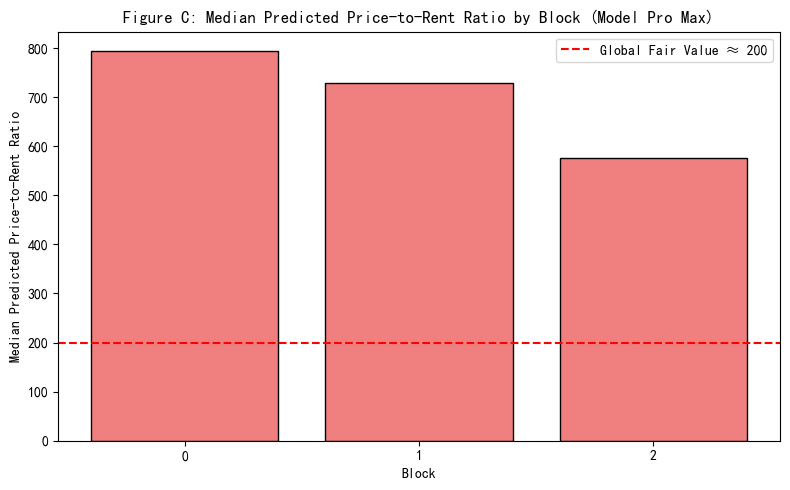

In [13]:
# 各 block 的中位数预测房价与租金
price_median_plus = price_df.groupby('location')['price_m2_pred_plus'].median().reset_index()
price_median_plus.columns = ['location', 'median_price_m2_pred_plus']

rent_median_plus = rent_df.groupby('location')['rent_m2_pred_plus'].median().reset_index()
rent_median_plus.columns = ['location', 'median_rent_m2_pred_plus']

# 合并两者
merged_median_plus = pd.merge(price_median_plus, rent_median_plus, on='location', how='inner')

# 计算每个 block 的房价租金比
merged_median_plus['median_price_to_rent_ratio_plus'] = (
    merged_median_plus['median_price_m2_pred_plus'] / merged_median_plus['median_rent_m2_pred_plus']
)

print("\n🏠 Median Predicted Price-to-Rent Ratio (Model Pro Max):")
print(merged_median_plus)

# 绘制柱状图
plt.figure(figsize=(8,5))
plt.bar(merged_median_plus.index.astype(str), merged_median_plus['median_price_to_rent_ratio_plus'], color='lightcoral', edgecolor='black')
plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value ≈ 200')
plt.title('Figure C: Median Predicted Price-to-Rent Ratio by Block (Model Pro Max)')
plt.xlabel('Block')
plt.ylabel('Median Predicted Price-to-Rent Ratio')
plt.legend()
plt.tight_layout()
plt.show()
